# 훈련 세트와 검증 세트를 준비합니다

## IMDB데이터 세트 불러오기

skip_top 매개변수에는 가장많이 등장한 단어들중 건너 뛸 단어의 개수를 지정할수 있습니다. 예를 들어 a, the, is 등과 같은 단어들은 영화 리뷰에 많이 등장하지만 분석에 유용하지 않으므로 건너뜁니다.
num_words매개변수는 훈련에 사용할 단어의 개수를 지정합니다. 메모리를 절약하기 위해 num_words에 200을 지정했습니다.

In [4]:
import numpy as np 
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all),(x_test,y_test)=imdb.load_data(skip_top=20,num_words=200)
x_train_all.shape, y_train_all.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

훈련 세트의 샘플을 확인해보면 영단어가 아니라 정수가 나타납니다. 이 정수들은 영단어를 고유한 정수에 일대일 대응한것으로, BoW(Bag of word)혹은 어휘 사전이라고 부릅니다. 훈련 세트에서는 눈에 띄는 숫자인 2는 어휘 사전에 없는 단어를 의미합니다. 가장 많이 등장하는 영단어 20개를 건너뛰고 200개의 단어만 선택했기 때문에 사전에 없는 영단어가 많습니다.

In [6]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 173, 36, 2, 2, 25, 100, 43, 2, 112, 50, 2, 2, 2, 35, 2, 2, 2, 150, 2, 172, 112, 167, 2, 2, 2, 39, 2, 172, 2, 2, 2, 2, 38, 2, 2, 2, 192, 50, 2, 2, 147, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 106, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 130, 2, 2, 38, 2, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 107, 117, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 104, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 141, 2, 194, 2, 2, 2, 2, 22, 21, 134, 2, 26, 2, 2, 144, 30, 2, 2, 51, 36, 28, 2, 92, 25, 104, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 113, 103, 32, 2, 2, 2, 2, 178, 32]


## 훈련 세트에서 2제외 하기 

In [9]:
for i in range(len(x_train_all)):
    x_train_all[i]=[w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 173, 36, 25, 100, 43, 112, 50, 35, 150, 172, 112, 167, 39, 172, 38, 192, 50, 147, 22, 22, 71, 87, 43, 38, 76, 22, 62, 106, 66, 33, 130, 38, 25, 124, 51, 36, 135, 48, 25, 33, 22, 28, 77, 52, 82, 107, 117, 36, 71, 43, 26, 46, 104, 88, 98, 32, 56, 26, 141, 194, 22, 21, 134, 26, 144, 30, 51, 36, 28, 92, 25, 104, 65, 38, 88, 113, 103, 32, 178, 32]


## 어휘 사전 내려받기

정수를 영단어로 바꾸려면 어휘사전이 필요합니다. 어휘사전은 get_word_index()함수로 내려받을 수 있습니다. 이 함수는 영단어와 정수로 구성된 딕셔너리를 반환합니다. 다음은 어휘 사전을 내려받은 다음 딕셔너리의 키 값을 movie로 지정하여 값을 출력한 것입니다. movie라는 영단어는 17이라는 정수에 대응되어 있음을 알 수 있습니다.

In [10]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

1641221/1641221 [==============================] - 0s 0us/step


17

## 훈련세트의 정수를 영단어로 변환하기

훈련 세트에 있는 정수는 3이상부터 영단어를 의미하므로 3을 뺀 값을 어휘 사전의 인덱스로 사용해야 합니다. 훈련 세트를 영단어로 변환하여 출력해 보겠습니다.

In [12]:
index_to_word = {word_to_index[k]:k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w-3], end=' ')

film just story really part they you could just being there an now same being director from same so fact there real film film were great just so much film would watch really at end so you know what they say if you at film have been good also two little they were just are out think because them all up are such big film but these are should be what they have don't you think story so because life after all us all 

## 훈련 샘플의 길이 확인하기

훈련 세트의 입력 데이터는 넘파이 배열이 아니라 파이썬 리스트입니다. 각 리뷰들의 길이가 달라 샘플의 길이가 다르기 때문입니다. 두 샘플의 길이를 직접 확인해보겠습니다.

In [15]:
print(len(x_train_all[0]),len(x_train_all[1]))

84 63


샘플의 길이는 각각 84, 63입니다. 길이에 큰 차이가 있네요. 샘플의 길이가 다르면 모델을 제대로 훈련시킬 수 없습니다.

## 훈련 세트의 타깃 데이터 확인하기

타깃 데이터도 확인해 보겠습니다. 이진 분류 문제이므로 타깃 데이터는 1,0으로 영화 리뷰가 긍정(1)인지 부정(0)인지를 나타냅니다.

In [16]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


## 검증 세트를 준비합니다

25000개의 훈련세트중 5000개만 분리하여 validation 세트로 사용하겠습니다. 넘파이 permutation()함수를 사용하여 25000개의 인덱스를 섞은 후 앞의 20000개는 train 세트,나머지는 validation세트로 분리합니다.

In [18]:
np.random.seed(42)
random_index=np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]
x_train.shape,x_val.shape

((20000,), (5000,))

# 샘플의 길이 맞추기

일정 길이가 넘으면 샘플을 잘라버리고 길이가 모자라면 0으로 채웁니다. 0을 추가할땐 샘플의 앞쪽에 추가해야합니다. 만약 뒤에 0을 추가하면 이후 샘플이 순환 신경망에 주입될 때 0이 마지막에 주입되므로 모델의 성능이 좋지 않을 것입니다.

## 텐서플로로 샘풀의 길이 맞추기

최대 길이를 200으로 설정하여 길이가 동일한 2개의 넘파이 배열을 만듭니다.
샘플 길이를 변경한 훈련 세트의 첫번째 샘플을 확인하면 앞쪽에 0이 채워져 있습니다.

In [30]:
from tensorflow.keras.preprocessing import sequence

maxlen=200
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)
print(x_train_seq.shape, x_val_seq.shape)
print(x_train_seq[0])

(20000, 200) (5000, 200)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  35 129  40  27  28  40  22  83  31 103  85 116  45  24 196 159
  23  31 160  70  31 160  76 181  30 172  98  32  22 100  28  51  75 130
  56 105 186  30 168  33  97  53  38  46 117  53  74  31  35  23  34 167
  22  58]


# 샘플을 원핫 인코딩 하기

훈련데이터를 준비하기 위한 마지막 작업은 정수 데이터를 원-핫 인코딩 하는것 입니다.

## 텐서플로로 원-핫 인코딩 하기

20000개의 샘플이 200차원으로 원-핫 인코딩 되었습니다.
샘플을 200개의 단어로 제한했지만 x_train_onehot의 크기를 확인해보면 3.2기가에 다다릅니다.

In [33]:
from tensorflow.keras.utils import to_categorical
x_train_onehot=to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

print(x_train_onehot.shape)
print(x_train_onehot.nbytes)

(20000, 200, 200)
3200000000


# 순환 신경망 클래스 구현하기

In [45]:
import tensorflow as tf
class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     # 셀 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1h = None            # 은닉 상태에 대한 가중치
        self.w1x = None            # 입력에 대한 가중치
        self.b1 = None             # 순환층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   # 은닉 상태를 초기화합니다.
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산합니다.
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용합니다.
            self.h.append(h)                   # 역전파를 위해 은닉 상태 저장합니다.
            z2 = np.dot(h, self.w2) + self.b2  # 출력층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트를 계산합니다.
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파합니다.
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산합니다.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m
    
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    

    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    

    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           # 은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 셀의 가중치와 절편을 업데이트합니다.
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return z > 0                 # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

## 정방향 계산 구현하기

def forpass
각 타임 스텝의 은닉상태를 저장하기 위한 변수 h를 초기화합니다. 이때 은닉 상태의 크기는(샘플 개수, 셀 개수)입니다. 역전파 과정을 진행할 때 이전 타임 스텝의 은닉 상태를 사용합니다. 첫 번째 타임 스텝의 이전 은닉 상태는 없으므로 변수 h의 첫 번째 요소에 0으로 채워진 배열을 추가합니다.
그런 다음 swapaxes() 함수를 사용하여 입력 x의 첫번째 배치 차원과 두번째 타임 스텝 차원을 바꿉니다. 
배치 차원과 타임 스텝 차원을 바꾸는 이유는
입력 x는 여러 개의 샘플이 담긴 미니 배치입니다. 정방향 계산을 할때는 한 샘플의 모든 타임 스텝을 처리하고 그 다음에 샘플을 처리하는 방식이 아닙니다. 미니 배치 안에 있는 모든 샘플의 첫 번째 타임 스텝을 한번에 처리하고 두 번째 타임 스텝을 한번에 처리해야합니다. 이를 손쉽게 구현하기 위해 배치 차원과 타임 스텝 차원을 바꾼 것 입니다.

## 역방향 계산 구현하기

def backprop
이제 역방향 계산을 위한 backprop()메서드를 구현하겠습니다. 여기서도 모든 샘플의 타임 스텝을 한번에 처리하기 위해 배치 차원과 타임 스텝 차원을 바꾸었습니다. err_to_cell 변수에 저장되는 값은 Z1에 대하여 손실 함수를 미분한 도함수의 결괏값입니다.

## 직교 행렬 방식으로 가중치 초기화 하기

def init_weights
직교행렬 초기화는 순환 셀에서 은닉 상태를 위한 가중치가 반복해서 곱해질 때 너무 커지거나 작아지지 않도록 만들어줍니다. 텐서플로가 제공하는 가중치 초기화 클래스는 tensorflow.initializer모듈에 들어 있으며 직교 행렬 초기화는 Orthogonal클래스로 제공합니다. Orthogonal클래스의 객체를 만든 다음 생성하려는 가중치 행렬의 크기를 입력하면 가중치의 값이 초기화된 텐서가 반환됩니다.numpy()메서드를 사용해 텐서를 넘파이 배열로 변환하여 가중치 변수에 저장합니다.

# 순환 신경망 모델 훈련시키기

In [46]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

C:\Users\yimst\AppData\Roaming\Python\Python39\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

에포크 12 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 13 ........................................................................................................................................................................................................................................................................................................................................................................

## 훈련, 검증 세트에 대한 손실 그래프 그리기

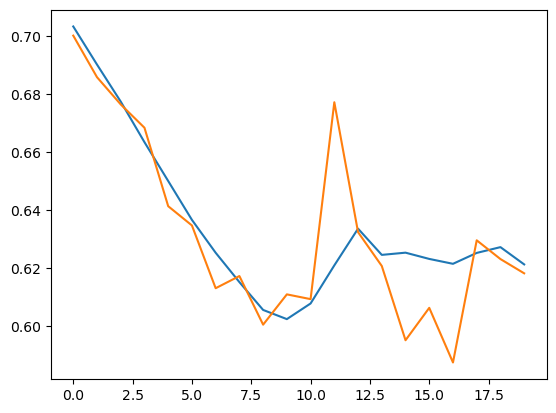

In [49]:
import matplotlib.pyplot as plt
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

## 검증 세트 정확도 평가하기

In [50]:
rn.score(x_val_onehot,y_val)

0.6582

순환 신경망 훈련을 마쳤습니다. 예측 확률 65% 성능이 나왔습니다.